# Examine the Output

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from matplotlib import animation, rc
from IPython.core.display import HTML

## Load the test output

In [3]:
predData = np.loadtxt("./output/16/models/testPred.csv", delimiter=',')
predGroundTruth = np.loadtxt("./output/16/models/testLabel.csv", delimiter=',')
predNode, predTimeLength = predData.shape
print(f"Node Count: {predNode}, Time Slices: {predTimeLength}, Time Length: {predTimeLength / 6} hours")

Node Count: 297, Time Slices: 1428, Time Length: 238.0 hours


## Output Format

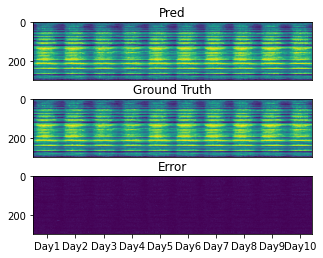

In [4]:
plt.figure(figsize=(5, 4))
plt.subplot(311)
plt.imshow(predData)
plt.title("Pred")
plt.xticks([], [])
plt.subplot(312)
plt.imshow(predGroundTruth)
plt.title("Ground Truth")
plt.xticks([], [])
plt.subplot(313)
plt.imshow(np.abs(predData - predGroundTruth))
plt.title("Error")
plt.xticks([(i + 0.5) * 6 * 24 for i in range(int(predTimeLength / 6 // 24) + 1)], [f"Day{i+1}" for i in range(int(predTimeLength / 6 // 24) + 1)])
None

## Visualized Output

In [5]:
coord = np.loadtxt("./RS/featRSCord.csv", delimiter=',')[:, :2].astype(np.int)
maxCoord = np.max(coord, axis=0)

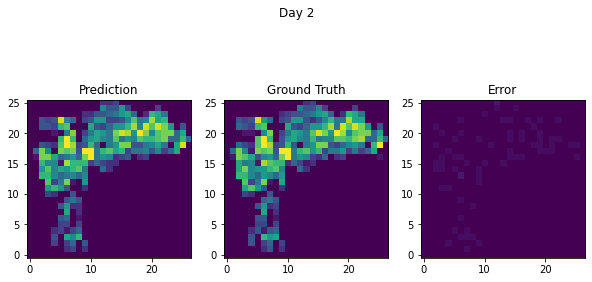

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
fig.suptitle("Day 0")
axes[0].set_title("Prediction")
axes[1].set_title("Ground Truth")
axes[2].set_title("Error")
imPred = axes[0].imshow(np.zeros(maxCoord + 1), origin='lower', vmin=0, vmax=15)
imGT = axes[1].imshow(np.zeros(maxCoord + 1),  origin='lower', vmin=0, vmax=15)
imErr = axes[2].imshow(np.zeros(maxCoord + 1),  origin='lower', vmin=0, vmax=32)
im = [imPred, imGT, imErr]
def plotMat(t):
    predMat = np.zeros(maxCoord + 1)
    gtMat = np.zeros(maxCoord + 1)
    for nodeIdx in range(predNode):
        predMat[coord[nodeIdx, 0], coord[nodeIdx, 1]] = predData[nodeIdx, t]
        gtMat[coord[nodeIdx, 0], coord[nodeIdx, 1]] = predGroundTruth[nodeIdx, t]
    errMat = np.abs(predMat - gtMat)
    im[0].set_data(predMat)
    im[1].set_data(gtMat)
    im[2].set_data(errMat)
    fig.suptitle(f"Day {int(t / 6 // 24) + 1}")
    return im
anim = animation.FuncAnimation(fig, plotMat, frames=range(0, 2 * 6 * 24, 10), interval=100, blit=True)
HTML(anim.to_jshtml())

## Evaluation Result

In [7]:
acc = accuracy_score(predGroundTruth.flatten(), predData.flatten())
prec, recall, f1, _ = precision_recall_fscore_support(predGroundTruth.flatten(), predData.flatten(), average='macro')
print(f"Accuracy: {acc: .3%}")
print(f"F1: {f1: .3%} Precision: {prec: .3%} Recall: {recall: .3%}")

Accuracy:  75.756%
F1:  74.607% Precision:  74.690% Recall:  74.548%
